In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset

In [2]:
# Data import
customer = pd.read_excel('all_data.xlsx', usecols=['cInvoiceCode', 'JobtypeNo', 'Jdate', 
       'vCustomerName', 'Reg_no', 'TotalAmount', 'TotalAmt', 'GrandTotal', 'VCompanyName',
       'cCustomerCode', 'VehicelID', 'cCompanyCode', 'Model', 'cWorkerCode',
       'vWorkerName', 'vMobile', 'totalLaborwithtax', 'JobcardNo', 'Discount'], 
        dtype={'cInvoiceCode':'int16', 'vMobile':'object'})
items = pd.read_excel('items_con.xlsx')

# # # Renaming the columns to make it better
customer.rename(columns={'TotalAmount':'Labour', 'TotalAmt':'Parts'}, inplace=True)

In [3]:
# Data Backup
customer_df = customer.copy()
items_df = items.copy()

In [4]:
# Data types of the columns
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cInvoiceCode       1048 non-null   int16         
 1   JobtypeNo          1048 non-null   int64         
 2   Jdate              1048 non-null   datetime64[ns]
 3   vCustomerName      1048 non-null   object        
 4   Reg_no             1045 non-null   object        
 5   Labour             1036 non-null   float64       
 6   Parts              1010 non-null   float64       
 7   GrandTotal         1048 non-null   int64         
 8   VCompanyName       1048 non-null   object        
 9   cCustomerCode      1048 non-null   object        
 10  VehicelID          1048 non-null   object        
 11  cCompanyCode       1048 non-null   object        
 12  Model              1048 non-null   object        
 13  cWorkerCode        1048 non-null   object        
 14  vWorkerN

# Find and fill na values

In [5]:
# $ Find duplicated values

In [6]:
customer_df.duplicated().sum()

0

In [7]:
# # # Total Amount

In [8]:
customer_df.isna().sum()

cInvoiceCode          0
JobtypeNo             0
Jdate                 0
vCustomerName         0
Reg_no                3
Labour               12
Parts                38
GrandTotal            0
VCompanyName          0
cCustomerCode         0
VehicelID             0
cCompanyCode          0
Model                 0
cWorkerCode           0
vWorkerName           0
vMobile               1
totalLaborwithtax     0
JobcardNo             0
Discount              0
dtype: int64

In [9]:
customer_df[customer_df['Labour'].isna() == True]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
18,19,111,2022-09-14,RAMDARAS,UP52AD8294,NaN,413.0,400,BIKERS CLUB,CM000020,VH000020,CC000001,HF DELUXE,WM000001,Ronu,8303324914,0.0,JC000019,13
29,30,121,2022-09-18,MUNNA,UP32GY7024,NaN,291.0,300,BIKERS CLUB,CM000032,VH000032,CC000001,SHINA,WM000001,Ronu,9839663267,0.0,JC000030,0
36,38,129,2022-09-19,DEEP,UP32AK9932,NaN,594.0,550,BIKERS CLUB,CM000040,VH000040,CC000001,ACTIVA,WM000002,Shiv Kumar,8354991317,0.0,JC000038,44
135,138,234,2022-10-29,DEEPAK VERMA,UP32LZ3834,NaN,542.0,740,BIKERS CLUB,CM000142,VH000142,CC000001,SUPER SPLENDER,WM000001,Ronu,9115226115,200.0,JC000140,2
151,154,244,2022-10-30,MANOJ SINGH,UP44AN2103,NaN,35.0,285,BIKERS CLUB,CM000158,VH000158,CC000001,BAJAJ VIKRANT,WM000002,Shiv Kumar,9161524577,250.0,JC000156,0
285,290,375,2022-12-13,DEEPAK,UP32EL8911,NaN,NaN,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
442,449,522,2023-02-01,VIMLESH,UP32KX9502,NaN,NaN,350,BIKERS CLUB,CM000456,VH000456,CC000001,APACHE,WM000001,Ronu,9140131771,200.0,JC000453,0
463,470,0,2023-02-10,SOHAN,UP32GX8316,NaN,NaN,0,BIKERS CLUB,CM000486,VH000486,CC000001,PASS.X.PRO,WM000002,Shiv Kumar,9795286749,0.0,JC000482,0
835,846,912,2023-06-05,MANDEEP KUMAR YADAV,UP62AW5557,NaN,680.0,680,BIKERS CLUB,CM000874,VH000874,CC000001,HERO SPL+,WM000007,BABLOO,9918861429,0.0,JC000870,0
948,960,1029,2023-07-07,A.K.SHARMA,UP32HP8689,NaN,350.0,550,BIKERS CLUB,CM000988,VH000988,CC000001,TVS SPORT,WM000002,Shiv Kumar,9795894109,200.0,JC000984,0


In [10]:
# Changing the labour values to grandtotal - parts
customer_df['GrandTotal'] - customer_df['Parts'] + customer_df['Discount']

0       450.0
1       200.0
2       400.0
3       200.0
4       200.0
        ...  
1043    200.0
1044    300.0
1045    236.0
1046    602.0
1047    236.0
Length: 1048, dtype: float64

In [11]:
na_index_labour = customer_df[customer_df['Labour'].isna() == True].index
na_index_labour = list(na_index_labour)

In [12]:
customer_df['Labour'].fillna(customer_df['GrandTotal'] - customer_df['Parts'] + customer_df['Discount'], inplace=True)

In [13]:
customer_df.loc[na_index_labour]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
18,19,111,2022-09-14,RAMDARAS,UP52AD8294,0.0,413.0,400,BIKERS CLUB,CM000020,VH000020,CC000001,HF DELUXE,WM000001,Ronu,8303324914,0.0,JC000019,13
29,30,121,2022-09-18,MUNNA,UP32GY7024,9.0,291.0,300,BIKERS CLUB,CM000032,VH000032,CC000001,SHINA,WM000001,Ronu,9839663267,0.0,JC000030,0
36,38,129,2022-09-19,DEEP,UP32AK9932,0.0,594.0,550,BIKERS CLUB,CM000040,VH000040,CC000001,ACTIVA,WM000002,Shiv Kumar,8354991317,0.0,JC000038,44
135,138,234,2022-10-29,DEEPAK VERMA,UP32LZ3834,200.0,542.0,740,BIKERS CLUB,CM000142,VH000142,CC000001,SUPER SPLENDER,WM000001,Ronu,9115226115,200.0,JC000140,2
151,154,244,2022-10-30,MANOJ SINGH,UP44AN2103,250.0,35.0,285,BIKERS CLUB,CM000158,VH000158,CC000001,BAJAJ VIKRANT,WM000002,Shiv Kumar,9161524577,250.0,JC000156,0
285,290,375,2022-12-13,DEEPAK,UP32EL8911,NaN,NaN,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
442,449,522,2023-02-01,VIMLESH,UP32KX9502,NaN,NaN,350,BIKERS CLUB,CM000456,VH000456,CC000001,APACHE,WM000001,Ronu,9140131771,200.0,JC000453,0
463,470,0,2023-02-10,SOHAN,UP32GX8316,NaN,NaN,0,BIKERS CLUB,CM000486,VH000486,CC000001,PASS.X.PRO,WM000002,Shiv Kumar,9795286749,0.0,JC000482,0
835,846,912,2023-06-05,MANDEEP KUMAR YADAV,UP62AW5557,0.0,680.0,680,BIKERS CLUB,CM000874,VH000874,CC000001,HERO SPL+,WM000007,BABLOO,9918861429,0.0,JC000870,0
948,960,1029,2023-07-07,A.K.SHARMA,UP32HP8689,200.0,350.0,550,BIKERS CLUB,CM000988,VH000988,CC000001,TVS SPORT,WM000002,Shiv Kumar,9795894109,200.0,JC000984,0


In [14]:
# Dealing with 0 values in all Amount columns

In [15]:
customer_df['Labour'].fillna(0, inplace=True)

In [16]:
customer_df.loc[na_index_labour]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
18,19,111,2022-09-14,RAMDARAS,UP52AD8294,0.0,413.0,400,BIKERS CLUB,CM000020,VH000020,CC000001,HF DELUXE,WM000001,Ronu,8303324914,0.0,JC000019,13
29,30,121,2022-09-18,MUNNA,UP32GY7024,9.0,291.0,300,BIKERS CLUB,CM000032,VH000032,CC000001,SHINA,WM000001,Ronu,9839663267,0.0,JC000030,0
36,38,129,2022-09-19,DEEP,UP32AK9932,0.0,594.0,550,BIKERS CLUB,CM000040,VH000040,CC000001,ACTIVA,WM000002,Shiv Kumar,8354991317,0.0,JC000038,44
135,138,234,2022-10-29,DEEPAK VERMA,UP32LZ3834,200.0,542.0,740,BIKERS CLUB,CM000142,VH000142,CC000001,SUPER SPLENDER,WM000001,Ronu,9115226115,200.0,JC000140,2
151,154,244,2022-10-30,MANOJ SINGH,UP44AN2103,250.0,35.0,285,BIKERS CLUB,CM000158,VH000158,CC000001,BAJAJ VIKRANT,WM000002,Shiv Kumar,9161524577,250.0,JC000156,0
285,290,375,2022-12-13,DEEPAK,UP32EL8911,0.0,NaN,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
442,449,522,2023-02-01,VIMLESH,UP32KX9502,0.0,NaN,350,BIKERS CLUB,CM000456,VH000456,CC000001,APACHE,WM000001,Ronu,9140131771,200.0,JC000453,0
463,470,0,2023-02-10,SOHAN,UP32GX8316,0.0,NaN,0,BIKERS CLUB,CM000486,VH000486,CC000001,PASS.X.PRO,WM000002,Shiv Kumar,9795286749,0.0,JC000482,0
835,846,912,2023-06-05,MANDEEP KUMAR YADAV,UP62AW5557,0.0,680.0,680,BIKERS CLUB,CM000874,VH000874,CC000001,HERO SPL+,WM000007,BABLOO,9918861429,0.0,JC000870,0
948,960,1029,2023-07-07,A.K.SHARMA,UP32HP8689,200.0,350.0,550,BIKERS CLUB,CM000988,VH000988,CC000001,TVS SPORT,WM000002,Shiv Kumar,9795894109,200.0,JC000984,0


In [17]:
# # # Parts

In [18]:
# Storing the indexes of parts na values rows
na_index_parts = customer_df[customer_df['Parts'].isna() == True].index
na_index_parts = list(na_index_parts)

In [19]:
customer_df[customer_df['Parts'].isna() == True]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
5,6,94,2022-09-11,MANVENDRA,UP34AJ4516,0.0,NaN,400,BIKERS CLUB,CM000007,VH000007,CC000001,RE CLASSIC 350,WM000001,Ronu,7992486892,400.0,JC000006,0
82,85,179,2022-10-06,AMIT KUMAR,UP32JE4607,0.0,NaN,200,BIKERS CLUB,CM000089,VH000089,CC000001,ACTIVA,WM000002,Shiv Kumar,8874515138,200.0,JC000087,0
91,94,189,2022-10-09,ABDUL MALIK,UP32JX5908,300.0,NaN,250,BIKERS CLUB,CM000098,VH000098,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,9695410837,300.0,JC000096,50
120,123,216,2022-10-19,MOIN,UP32LC2345,0.0,NaN,200,BIKERS CLUB,CM000127,VH000127,CC000001,PULSAR,WM000002,Shiv Kumar,8707678434,200.0,JC000125,0
139,142,227,2022-10-29,VISHAL,UP30HR0254,0.0,NaN,450,BIKERS CLUB,CM000146,VH000146,CC000001,BAJAJ AVENGER,WM000002,Shiv Kumar,7570803239,450.0,JC000144,0
214,217,312,2022-11-21,RAJAT,UP52BE4061,0.0,NaN,200,BIKERS CLUB,CM000223,VH000223,CC000001,PLEASURE,WM000001,Ronu,7800443901,200.0,JC000220,0
230,235,331,2022-11-29,ASHISH YADAV,UP32MM9230,0.0,NaN,200,BIKERS CLUB,CM000241,VH000241,CC000001,TVS RAIDER,WM000002,Shiv Kumar,8299010107,200.0,JC000238,0
250,255,3450,2022-12-04,MISHRA,UP32LQ0590,0.0,NaN,0,BIKERS CLUB,CM000261,VH000261,CC000001,ACTIVA,WM000002,Shiv Kumar,0000000000,0.0,JC000258,0
285,290,375,2022-12-13,DEEPAK,UP32EL8911,0.0,NaN,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
298,303,389,2022-12-17,TRILOK SINGH,UP32MD1567,0.0,NaN,200,BIKERS CLUB,CM000310,VH000310,CC000001,JUPITER,WM000005,AVINASH,8299321392,200.0,JC000307,0


In [20]:
# Function to allot parts price

In [21]:
# df['A'] = df.apply(lambda row: row['C'] - row['B'] if pd.isna(row['A']) else row['A'], axis=1)

In [22]:
def parts_price(rows):
    if pd.isna(rows['Parts']) and rows['GrandTotal'] >= 200:
        return (rows['GrandTotal'] - rows['Labour'] - 200)
    elif pd.isna(rows['Parts']) and rows['GrandTotal'] < 200:
        return (rows['GrandTotal'])
    elif pd.isna(rows['Parts']) and rows['GrandTotal'] == 0:
        return 0
    else:
        return (rows['GrandTotal'])

In [23]:
# Changing all the values of Parts by subtracting from grand total
customer_df['Parts'] = customer_df.apply(parts_price, axis=1)

In [24]:
customer_df.iloc[na_index_parts]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
5,6,94,2022-09-11,MANVENDRA,UP34AJ4516,0.0,200.0,400,BIKERS CLUB,CM000007,VH000007,CC000001,RE CLASSIC 350,WM000001,Ronu,7992486892,400.0,JC000006,0
82,85,179,2022-10-06,AMIT KUMAR,UP32JE4607,0.0,0.0,200,BIKERS CLUB,CM000089,VH000089,CC000001,ACTIVA,WM000002,Shiv Kumar,8874515138,200.0,JC000087,0
91,94,189,2022-10-09,ABDUL MALIK,UP32JX5908,300.0,-250.0,250,BIKERS CLUB,CM000098,VH000098,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,9695410837,300.0,JC000096,50
120,123,216,2022-10-19,MOIN,UP32LC2345,0.0,0.0,200,BIKERS CLUB,CM000127,VH000127,CC000001,PULSAR,WM000002,Shiv Kumar,8707678434,200.0,JC000125,0
139,142,227,2022-10-29,VISHAL,UP30HR0254,0.0,250.0,450,BIKERS CLUB,CM000146,VH000146,CC000001,BAJAJ AVENGER,WM000002,Shiv Kumar,7570803239,450.0,JC000144,0
214,217,312,2022-11-21,RAJAT,UP52BE4061,0.0,0.0,200,BIKERS CLUB,CM000223,VH000223,CC000001,PLEASURE,WM000001,Ronu,7800443901,200.0,JC000220,0
230,235,331,2022-11-29,ASHISH YADAV,UP32MM9230,0.0,0.0,200,BIKERS CLUB,CM000241,VH000241,CC000001,TVS RAIDER,WM000002,Shiv Kumar,8299010107,200.0,JC000238,0
250,255,3450,2022-12-04,MISHRA,UP32LQ0590,0.0,0.0,0,BIKERS CLUB,CM000261,VH000261,CC000001,ACTIVA,WM000002,Shiv Kumar,0000000000,0.0,JC000258,0
285,290,375,2022-12-13,DEEPAK,UP32EL8911,0.0,0.0,0,BIKERS CLUB,CM000296,VH000296,CC000001,PULSAR 220,WM000002,Shiv Kumar,9369555234,0.0,JC000293,0
298,303,389,2022-12-17,TRILOK SINGH,UP32MD1567,0.0,0.0,200,BIKERS CLUB,CM000310,VH000310,CC000001,JUPITER,WM000005,AVINASH,8299321392,200.0,JC000307,0


In [25]:
# Changing value of a negative cell(Corrupt Data)
customer_df.loc[91, 'Parts'] = 0

In [26]:
# Alloting the labour column the remaning values

In [27]:
customer_df.loc[na_index_parts, "Labour"] = customer_df['GrandTotal'] - customer_df['Parts']

In [28]:
customer_df[customer_df['Reg_no'].isna() == True]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
10,11,103,2022-09-12,AMBUJ OJHA,NaN,200.0,850.0,850,BIKERS CLUB,CM000012,VH000012,CC000001,PASSION PRO,WM000001,Ronu,9140757761,200.0,JC000011,13
13,14,105,2022-09-12,ANUP,NaN,200.0,250.0,250,BIKERS CLUB,CM000015,VH000015,CC000001,HERO HF DELUX,WM000001,Ronu,9517271307,200.0,JC000014,10
17,18,108,2022-09-13,KIRANA SHOP,NaN,200.0,580.0,580,BIKERS CLUB,CM000019,VH000019,CC000001,SPL PRO,WM000002,Shiv Kumar,0000000000,200.0,JC000018,33


In [29]:
# # # Reg no

In [30]:
# Searching for registration number [Three missing 'Reg No.']

In [31]:
# 'AMBUJ OJHA'
customer_df['vCustomerName'].iloc[10]

'AMBUJ OJHA'

In [32]:
customer_df[customer_df['vCustomerName'] == customer_df['vCustomerName'].iloc[10]]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
10,11,103,2022-09-12,AMBUJ OJHA,NaN,200.0,850.0,850,BIKERS CLUB,CM000012,VH000012,CC000001,PASSION PRO,WM000001,Ronu,9140757761,200.0,JC000011,13


In [33]:
# 'ANUP'
customer_df['vCustomerName'].iloc[13]

'ANUP'

In [34]:
customer_df[customer_df['vCustomerName'] == customer_df['vCustomerName'].iloc[13]]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
13,14,105,2022-09-12,ANUP,NaN,200.0,250.0,250,BIKERS CLUB,CM000015,VH000015,CC000001,HERO HF DELUX,WM000001,Ronu,9517271307,200.0,JC000014,10


In [35]:
# 'ANUP'
customer_df['vCustomerName'].iloc[17]

'KIRANA SHOP'

In [36]:
customer_df[customer_df['vCustomerName'] == customer_df['vCustomerName'].iloc[17]]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
17,18,108,2022-09-13,KIRANA SHOP,NaN,200.0,580.0,580,BIKERS CLUB,CM000019,VH000019,CC000001,SPL PRO,WM000002,Shiv Kumar,0000000000,200.0,JC000018,33


In [37]:
# fill na values of reg no. with 'NO Reg No.'d

In [38]:
customer_df['Reg_no'].fillna('NO Reg No.', inplace=True)

In [39]:
# Checking the results of fillna of reg no.

In [40]:
customer_df[customer_df['Reg_no'] == 'NO Reg No.']

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
10,11,103,2022-09-12,AMBUJ OJHA,NO Reg No.,200.0,850.0,850,BIKERS CLUB,CM000012,VH000012,CC000001,PASSION PRO,WM000001,Ronu,9140757761,200.0,JC000011,13
13,14,105,2022-09-12,ANUP,NO Reg No.,200.0,250.0,250,BIKERS CLUB,CM000015,VH000015,CC000001,HERO HF DELUX,WM000001,Ronu,9517271307,200.0,JC000014,10
17,18,108,2022-09-13,KIRANA SHOP,NO Reg No.,200.0,580.0,580,BIKERS CLUB,CM000019,VH000019,CC000001,SPL PRO,WM000002,Shiv Kumar,0000000000,200.0,JC000018,33


In [41]:
# Check the left na values
customer_df.isna().sum()

cInvoiceCode         0
JobtypeNo            0
Jdate                0
vCustomerName        0
Reg_no               0
Labour               0
Parts                0
GrandTotal           0
VCompanyName         0
cCustomerCode        0
VehicelID            0
cCompanyCode         0
Model                0
cWorkerCode          0
vWorkerName          0
vMobile              1
totalLaborwithtax    0
JobcardNo            0
Discount             0
dtype: int64

In [42]:
customer_df[customer_df['vMobile'].isna() == True]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
7,8,98,2022-09-11,UTKARSH,GA08P8222,600.0,1150.0,1150,BIKERS CLUB,CM000009,VH000009,CC000001,DISCOVER,WM000002,Shiv Kumar,NaN,600.0,JC000008,67


In [43]:
# Checking if the name exist more than once to update the mobile no.
customer_df['vCustomerName'].iloc[7]

'UTKARSH'

In [44]:
customer_df[customer_df['vCustomerName'] == customer_df['vCustomerName'].iloc[7]]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
7,8,98,2022-09-11,UTKARSH,GA08P8222,600.0,1150.0,1150,BIKERS CLUB,CM000009,VH000009,CC000001,DISCOVER,WM000002,Shiv Kumar,NaN,600.0,JC000008,67


In [45]:
# Filling the na values of vmobile 

In [46]:
customer_df['vMobile'].fillna('NO Mobile No.', inplace=True)

In [47]:
customer_df.isna().sum()

cInvoiceCode         0
JobtypeNo            0
Jdate                0
vCustomerName        0
Reg_no               0
Labour               0
Parts                0
GrandTotal           0
VCompanyName         0
cCustomerCode        0
VehicelID            0
cCompanyCode         0
Model                0
cWorkerCode          0
vWorkerName          0
vMobile              0
totalLaborwithtax    0
JobcardNo            0
Discount             0
dtype: int64

In [48]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,VH000002,CC000001,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,VH000003,CC000001,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,VH000004,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,VH000005,CC000001,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,VH000006,CC000001,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,VH000785,CC000001,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0
1044,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,VH000786,CC000001,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0
1045,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,VH000790,CC000001,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0
1046,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,VH000841,CC000001,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161


# Merging the two files 

In [49]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,VH000002,CC000001,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,VH000003,CC000001,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,VH000004,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,VH000005,CC000001,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,VH000006,CC000001,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,VH000785,CC000001,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0
1044,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,VH000786,CC000001,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0
1045,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,VH000790,CC000001,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0
1046,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,VH000841,CC000001,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161


In [50]:
items

,JobcardNo,Jdate,Qty,PartCode1,cCompanyCode,vItemName
0,JC000111,2022-10-14,10,IM000263,CC000001,CHINA SCREW
1,JC000380,2023-01-08,7,IM000263,CC000001,CHINA SCREW
2,JC000975,2023-07-03,5,IM000263,CC000001,CHINA SCREW
3,JC000024,2022-09-15,4,IM000263,CC000001,CHINA SCREW
4,JC000039,2022-09-20,4,IM000037,CC000001,INDICATOR (SPLENDOR+)
...,...,...,...,...,...,...
3640,JC000821,2023-05-21,1,IM000221,CC000001,CASTROL ACTIVE HONDA 10W30
3641,JC000822,2023-05-21,1,IM000222,CC000001,CASTROL ACTIVE 4T 20W40 0.9L
3642,JC000828,2023-05-24,1,IM000222,CC000001,CASTROL ACTIVE 4T 20W40 0.9L
3643,JC000080,2022-10-02,0,IM000254,CC000001,CHAIN SPRAY


In [51]:
# Forming a group of items to merge with customers data base

In [52]:
grouped_items = items.groupby('JobcardNo').agg({
    'Jdate': 'first',
    'Qty': 'sum',
    'PartCode1': list,
    'cCompanyCode': 'first',
    'vItemName': list
}).reset_index()

In [53]:
grouped_items

,JobcardNo,Jdate,Qty,PartCode1,cCompanyCode,vItemName
0,JC000001,2022-09-07,7,"[IM000095, IM000101, IM000096, IM000214, IM000...",CC000001,"[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,JC000002,2022-09-08,2,"[IM000221, IM000053]",CC000001,"[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,JC000003,2022-09-10,2,"[IM000002, IM000223]",CC000001,"[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,JC000004,2022-09-10,1,[IM000221],CC000001,[CASTROL ACTIVE HONDA 10W30]
4,JC000005,2022-09-11,7,"[IM000115, IM000217, IM000222, IM000228, IM000...",CC000001,"[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...
1016,JC001060,2023-07-26,4,"[IM000468, IM000710, IM000480, IM000843]",CC000001,"[CLUTCH PLATE HERO SPL+, CASTROL ACTIVE ESSENT..."
1017,JC001061,2023-07-26,7,"[IM000468, IM000078, IM000720, IM000875, IM000...",CC000001,"[CLUTCH PLATE HERO SPL+, PLATE CLUTCH PRESSURE..."
1018,JC001062,2023-07-26,2,"[IM000264, IM000052]",CC000001,"[CASTROL ACTIVE SCOOTER, BRAKE SHOE (ACTIVA 4G)]"
1019,JC001063,2023-07-26,1,[IM000392],CC000001,[CASTROL ACTIV 4T 20W40]


In [54]:
# merging customer_df with grouped_items

In [55]:
mix_df = customer_df.merge(grouped_items, how='inner', on='JobcardNo')

In [56]:
mix_df

,cInvoiceCode,JobtypeNo,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Jdate_y,Qty,PartCode1,cCompanyCode_y,vItemName
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,Ronu,7719771481,450.0,JC000001,266,2022-09-07,7,"[IM000095, IM000101, IM000096, IM000214, IM000...",CC000001,"[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,Shiv Kumar,9369555234,200.0,JC000002,46,2022-09-08,2,"[IM000221, IM000053]",CC000001,"[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,Shiv Kumar,8299766335,400.0,JC000003,70,2022-09-10,2,"[IM000002, IM000223]",CC000001,"[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,Shiv Kumar,9839723385,200.0,JC000004,28,2022-09-10,1,[IM000221],CC000001,[CASTROL ACTIVE HONDA 10W30]
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,Ronu,8090060663,200.0,JC000005,60,2022-09-11,7,"[IM000115, IM000217, IM000222, IM000228, IM000...",CC000001,"[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,PANKAJ,9118174911,200.0,JC000781,0,2023-05-11,1,[IM000711],CC000001,[CASTROL POWER 1 10-W40 1LT]
1006,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,Shiv Kumar,9532722634,300.0,JC000782,0,2023-05-11,3,"[IM000221, IM000116, IM000629]",CC000001,"[CASTROL ACTIVE HONDA 10W30, EXHAUST FILTER (A..."
1007,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,Shiv Kumar,6386879411,236.0,JC000786,0,2023-05-12,4,"[IM000171, IM000052, IM000221, IM000293]",CC000001,"[AIR FILTER HONDA (ACTIVA), BRAKE SHOE (ACTIVA..."
1008,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,GROUP,8318434232,601.8,JC000837,161,2023-05-29,2,"[IM000349, IM000800]",CC000001,"[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"


In [57]:
mix_df['Labour'].fillna(value=0, inplace=True)

In [58]:
mix_df['Reg_no'].fillna('NO Reg No.', inplace=True)

In [59]:
mix_df['vMobile'].fillna('NO Mobile No.', inplace=True)

In [60]:
mix_df.isna().sum()

cInvoiceCode         0
JobtypeNo            0
Jdate_x              0
vCustomerName        0
Reg_no               0
Labour               0
Parts                0
GrandTotal           0
VCompanyName         0
cCustomerCode        0
VehicelID            0
cCompanyCode_x       0
Model                0
cWorkerCode          0
vWorkerName          0
vMobile              0
totalLaborwithtax    0
JobcardNo            0
Discount             0
Jdate_y              0
Qty                  0
PartCode1            0
cCompanyCode_y       0
vItemName            0
dtype: int64

In [61]:
mix_df.columns

Index(['cInvoiceCode', 'JobtypeNo', 'Jdate_x', 'vCustomerName', 'Reg_no',
       'Labour', 'Parts', 'GrandTotal', 'VCompanyName', 'cCustomerCode',
       'VehicelID', 'cCompanyCode_x', 'Model', 'cWorkerCode', 'vWorkerName',
       'vMobile', 'totalLaborwithtax', 'JobcardNo', 'Discount', 'Jdate_y',
       'Qty', 'PartCode1', 'cCompanyCode_y', 'vItemName'],
      dtype='object')

In [62]:
mix_df

,cInvoiceCode,JobtypeNo,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Jdate_y,Qty,PartCode1,cCompanyCode_y,vItemName
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,Ronu,7719771481,450.0,JC000001,266,2022-09-07,7,"[IM000095, IM000101, IM000096, IM000214, IM000...",CC000001,"[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,Shiv Kumar,9369555234,200.0,JC000002,46,2022-09-08,2,"[IM000221, IM000053]",CC000001,"[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,Shiv Kumar,8299766335,400.0,JC000003,70,2022-09-10,2,"[IM000002, IM000223]",CC000001,"[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,Shiv Kumar,9839723385,200.0,JC000004,28,2022-09-10,1,[IM000221],CC000001,[CASTROL ACTIVE HONDA 10W30]
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,Ronu,8090060663,200.0,JC000005,60,2022-09-11,7,"[IM000115, IM000217, IM000222, IM000228, IM000...",CC000001,"[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,PANKAJ,9118174911,200.0,JC000781,0,2023-05-11,1,[IM000711],CC000001,[CASTROL POWER 1 10-W40 1LT]
1006,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,Shiv Kumar,9532722634,300.0,JC000782,0,2023-05-11,3,"[IM000221, IM000116, IM000629]",CC000001,"[CASTROL ACTIVE HONDA 10W30, EXHAUST FILTER (A..."
1007,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,Shiv Kumar,6386879411,236.0,JC000786,0,2023-05-12,4,"[IM000171, IM000052, IM000221, IM000293]",CC000001,"[AIR FILTER HONDA (ACTIVA), BRAKE SHOE (ACTIVA..."
1008,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,GROUP,8318434232,601.8,JC000837,161,2023-05-29,2,"[IM000349, IM000800]",CC000001,"[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"


In [63]:
# deleting extra columns

In [64]:
mix_df.drop(mix_df.columns[[0, 1, 8, 11, 13, 19, 22]], axis=1, inplace=True)

In [65]:
mix_df

,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,cCustomerCode,VehicelID,Model,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Qty,PartCode1,vItemName
0,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,CM000002,VH000002,PULSAR,Ronu,7719771481,450.0,JC000001,266,7,"[IM000095, IM000101, IM000096, IM000214, IM000...","[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,CM000003,VH000003,TVS JUPITER,Shiv Kumar,9369555234,200.0,JC000002,46,2,"[IM000221, IM000053]","[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,CM000004,VH000004,YAMAHA R15 V3,Shiv Kumar,8299766335,400.0,JC000003,70,2,"[IM000002, IM000223]","[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,CM000005,VH000005,JUPITER,Shiv Kumar,9839723385,200.0,JC000004,28,1,[IM000221],[CASTROL ACTIVE HONDA 10W30]
4,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,CM000006,VH000006,HERO HONDA SPL,Ronu,8090060663,200.0,JC000005,60,7,"[IM000115, IM000217, IM000222, IM000228, IM000...","[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,CM000785,VH000785,HERO YUGA,PANKAJ,9118174911,200.0,JC000781,0,1,[IM000711],[CASTROL POWER 1 10-W40 1LT]
1006,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,CM000786,VH000786,ACTIVA,Shiv Kumar,9532722634,300.0,JC000782,0,3,"[IM000221, IM000116, IM000629]","[CASTROL ACTIVE HONDA 10W30, EXHAUST FILTER (A..."
1007,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,CM000790,VH000790,ACTIVA,Shiv Kumar,6386879411,236.0,JC000786,0,4,"[IM000171, IM000052, IM000221, IM000293]","[AIR FILTER HONDA (ACTIVA), BRAKE SHOE (ACTIVA..."
1008,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,CM000841,VH000841,PLEASURE,GROUP,8318434232,601.8,JC000837,161,2,"[IM000349, IM000800]","[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"


In [66]:
mix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Jdate_x            1010 non-null   datetime64[ns]
 1   vCustomerName      1010 non-null   object        
 2   Reg_no             1010 non-null   object        
 3   Labour             1010 non-null   float64       
 4   Parts              1010 non-null   float64       
 5   GrandTotal         1010 non-null   int64         
 6   cCustomerCode      1010 non-null   object        
 7   VehicelID          1010 non-null   object        
 8   Model              1010 non-null   object        
 9   vWorkerName        1010 non-null   object        
 10  vMobile            1010 non-null   object        
 11  totalLaborwithtax  1010 non-null   float64       
 12  JobcardNo          1010 non-null   object        
 13  Discount           1010 non-null   int64         
 14  Qty     

In [67]:
# Checking for na values in new file

In [68]:
mix_df

,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,cCustomerCode,VehicelID,Model,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Qty,PartCode1,vItemName
0,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,CM000002,VH000002,PULSAR,Ronu,7719771481,450.0,JC000001,266,7,"[IM000095, IM000101, IM000096, IM000214, IM000...","[CENTRE CLUTCH BAJAJ (PULSAR 150), PLATE CLUTC..."
1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,CM000003,VH000003,TVS JUPITER,Shiv Kumar,9369555234,200.0,JC000002,46,2,"[IM000221, IM000053]","[CASTROL ACTIVE HONDA 10W30, BRAKE SHOE (JUPIT..."
2,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,CM000004,VH000004,YAMAHA R15 V3,Shiv Kumar,8299766335,400.0,JC000003,70,2,"[IM000002, IM000223]","[MOTUL 20W50, AIR FILTER YAMAHA R15 V3]"
3,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,CM000005,VH000005,JUPITER,Shiv Kumar,9839723385,200.0,JC000004,28,1,[IM000221],[CASTROL ACTIVE HONDA 10W30]
4,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,CM000006,VH000006,HERO HONDA SPL,Ronu,8090060663,200.0,JC000005,60,7,"[IM000115, IM000217, IM000222, IM000228, IM000...","[AIR FILTER HANU (SPLENDOR+), BEARING 6301, CA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,CM000785,VH000785,HERO YUGA,PANKAJ,9118174911,200.0,JC000781,0,1,[IM000711],[CASTROL POWER 1 10-W40 1LT]
1006,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,CM000786,VH000786,ACTIVA,Shiv Kumar,9532722634,300.0,JC000782,0,3,"[IM000221, IM000116, IM000629]","[CASTROL ACTIVE HONDA 10W30, EXHAUST FILTER (A..."
1007,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,CM000790,VH000790,ACTIVA,Shiv Kumar,6386879411,236.0,JC000786,0,4,"[IM000171, IM000052, IM000221, IM000293]","[AIR FILTER HONDA (ACTIVA), BRAKE SHOE (ACTIVA..."
1008,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,CM000841,VH000841,PLEASURE,GROUP,8318434232,601.8,JC000837,161,2,"[IM000349, IM000800]","[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"


# Accessing Data

In [69]:
# The two files are
# 1. customer_df = File contaning all data
# 2. mix_df = File contaning items and all data

In [70]:
# Running basic test on data

In [71]:
# customer_df

In [72]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cInvoiceCode       1048 non-null   int16         
 1   JobtypeNo          1048 non-null   int64         
 2   Jdate              1048 non-null   datetime64[ns]
 3   vCustomerName      1048 non-null   object        
 4   Reg_no             1048 non-null   object        
 5   Labour             1048 non-null   float64       
 6   Parts              1048 non-null   float64       
 7   GrandTotal         1048 non-null   int64         
 8   VCompanyName       1048 non-null   object        
 9   cCustomerCode      1048 non-null   object        
 10  VehicelID          1048 non-null   object        
 11  cCompanyCode       1048 non-null   object        
 12  Model              1048 non-null   object        
 13  cWorkerCode        1048 non-null   object        
 14  vWorkerN

In [73]:
customer_df.describe()

,cInvoiceCode,JobtypeNo,Labour,Parts,GrandTotal,totalLaborwithtax,Discount
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,511.082061,986.981870,173.477099,1228.130725,1234.666985,270.957824,53.871183
std,305.203092,2090.641649,229.690368,1449.881312,1445.048681,219.365887,229.088067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,246.750000,366.750000,0.000000,600.000000,600.000000,200.000000,0.000000
50%,510.500000,647.500000,200.000000,800.000000,800.000000,200.000000,10.000000
75%,774.250000,914.250000,200.000000,1166.500000,1166.500000,250.000000,50.000000
max,1040.000000,35200.000000,1800.000000,19086.000000,19086.000000,2124.000000,5500.000000


In [74]:
# checking unusual entries
customer_df[customer_df['GrandTotal'] == 19086]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
459,466,1,2023-02-08,VINEET SUKLA,UP32FA6222,0.0,19086.0,19086,BIKERS CLUB,CM000480,VH000480,CC000001,DISCOVER,WM000001,Ronu,9984961465,1800.0,JC000477,0


In [75]:
mix_df[mix_df['GrandTotal'] == 19086]

,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,cCustomerCode,VehicelID,Model,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Qty,PartCode1,vItemName
442,2023-02-08,VINEET SUKLA,UP32FA6222,0.0,19086.0,19086,CM000480,VH000480,DISCOVER,Ronu,9984961465,1800.0,JC000477,0,38,"[IM000429, IM000544, IM000541, IM000159, IM000...","[CONNECTING ROD BEARING, SPARK PLUG, PULSAR RE..."


In [76]:
customer_df[customer_df['Discount'] == 5500]

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
489,496,588,2023-02-23,KRIPARAM PANDAY,UP32EC4796,1350.0,962.0,962,BIKERS CLUB,CM000512,VH000512,CC000001,SPL PRO,WM000002,Shiv Kumar,9919846852,1350.0,JC000508,5500


In [77]:
mix_df.sample(5)

,Jdate_x,vCustomerName,Reg_no,Labour,Parts,GrandTotal,cCustomerCode,VehicelID,Model,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,Qty,PartCode1,vItemName
113,2022-10-17,RAM NIWAS,RJ02LS2223,1400.0,5900.0,5900,CM000123,VH000123,HERO SPL+,Ronu,9910094762,1400.0,JC000121,273,13,"[IM000430, IM000267, IM000292, IM000428, IM000...","[BEARING CRANK, PISTON, WALL/WALL SEAL KIT, CO..."
6,2022-09-11,UTKARSH,GA08P8222,600.0,1150.0,1150,CM000009,VH000009,DISCOVER,Shiv Kumar,NO Mobile No.,600.0,JC000008,67,3,"[IM000093, IM000159, IM000227]","[FORK OIL SEAL BAJAJ (PULSAR), SHOCKER OIL, BA..."
90,2022-10-09,RAMESH YADAV,UP32HC8012,200.0,900.0,900,CM000100,VH000100,SUPER,Ronu,9454034860,200.0,JC000098,58,4,"[IM000317, IM000218, IM000226, IM000048]","[HALF AXLE GLAMOUR, BEARING 6203, SPEED FORCE ..."
466,2023-02-23,K.K.SINGH,UP42W5529,0.0,4652.0,4652,CM000508,VH000508,HERO PASSION PRO,Ronu,9653057894,650.0,JC000504,0,10,"[IM000267, IM000292, IM000718, IM000338, IM000...","[PISTON, WALL/WALL SEAL KIT, PACKING KIT PASSI..."
1008,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,CM000841,VH000841,PLEASURE,GROUP,8318434232,601.8,JC000837,161,2,"[IM000349, IM000800]","[ACTIVA SHOCKER ENDURANCE, WASH/POLISH]"



# UNI

In [78]:
# Univariate discount:

In [79]:
# Most discount error values
customer_df.sort_values(by='Discount', ascending=False).head(3)[['vCustomerName', 'Labour', 'Parts','GrandTotal', 'vWorkerName', 'Discount']]

,vCustomerName,Labour,Parts,GrandTotal,vWorkerName,Discount
489,KRIPARAM PANDAY,1350.0,962.0,962,Shiv Kumar,5500
633,AMIT KUMAR,750.0,694.0,694,BABLOO,2800
282,SHIV LALIT,500.0,292.0,292,Shiv Kumar,2000


In [80]:
# Reducing the discount amounts
customer_df['Discount'].loc[[489, 633, 282]] = 250

C:\Users\amrit\AppData\Local\Temp\ipykernel_936\1557915259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['Discount'].loc[[489, 633, 282]] = 250


In [81]:
customer_df.sort_values(by='Discount', ascending=False).head(3)[['vCustomerName', 'Labour', 'Parts','GrandTotal', 'vWorkerName', 'Discount']]

,vCustomerName,Labour,Parts,GrandTotal,vWorkerName,Discount
197,SACHIN PANDY,1000.0,7994.0,7994,Ronu,2000
186,OMKAR,1500.0,4262.0,4262,Ronu,1500
37,ASUTOSH RAI,500.0,2700.0,2700,Shiv Kumar,1129


In [82]:
customer_df['Discount'].describe()

count    1048.000000
mean       44.758588
std       115.583235
min         0.000000
25%         0.000000
50%        10.000000
75%        50.000000
max      2000.000000
Name: Discount, dtype: float64

In [83]:
# people with more discount than mean 75% value
customer_df[customer_df['Discount'] > 50].sort_values(by='Discount', ascending=False).head(50)['vWorkerName'].value_counts()

Shiv Kumar    21
Ronu          20
BABLOO         7
GROUP          2
Name: vWorkerName, dtype: int64

In [84]:
customer_df['Discount'].max()

2000

In [85]:
customer_df['Discount'].min()

0

<Axes: >

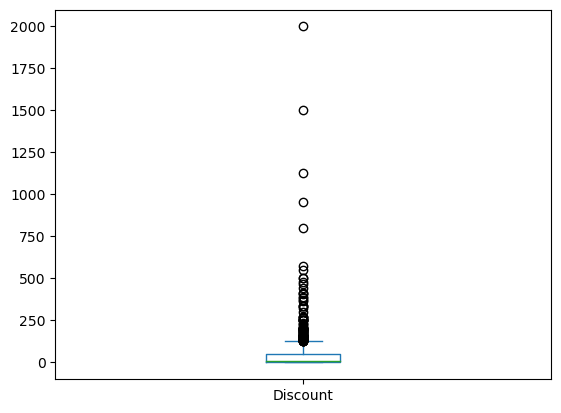

In [86]:
# Frequency distribution table
customer_df['Discount'].plot(kind='box')

<Axes: ylabel='Frequency'>

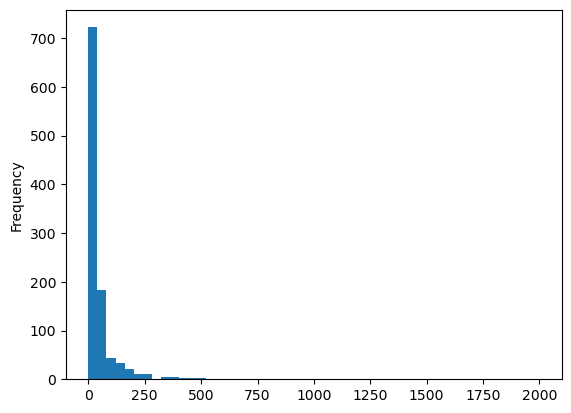

In [87]:
customer_df['Discount'].plot(kind='hist', bins=50)

In [88]:
# Univariate Grand Total:

In [89]:
customer_df['GrandTotal'].describe()

count     1048.000000
mean      1234.666985
std       1445.048681
min          0.000000
25%        600.000000
50%        800.000000
75%       1166.500000
max      19086.000000
Name: GrandTotal, dtype: float64

In [90]:
# Top grand totals
customer_df.sort_values(by='GrandTotal', ascending=False).head(5)

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
459,466,1,2023-02-08,VINEET SUKLA,UP32FA6222,0.0,19086.0,19086,BIKERS CLUB,CM000480,VH000480,CC000001,DISCOVER,WM000001,Ronu,9984961465,1800.0,JC000477,0
1037,12,5470,2023-02-08,VINEET SUKLA,UP32FA6222,1800.0,19000.0,19000,BIKERS CLUB,CM000483,VH000483,CC000001,DISCOVER,WM000001,Ronu,9984961465,2124.0,JC000479,574
1027,1040,1114,2023-07-27,X,UP32JS9752,1500.0,10600.0,10600,BIKERS CLUB,CM001068,VH001068,CC000001,BAJAJ AVENGER,WM000002,Shiv Kumar,0000000000,1500.0,JC001064,99
838,849,916,2023-06-07,SUMIT SINGH,UP32KA9076,1350.0,9500.0,9500,BIKERS CLUB,CM000877,VH000877,CC000001,ACTIVA,WM000008,GROUP,9170759433,1350.0,JC000873,25
756,765,823,2023-05-11,S,UP32EB7126,750.0,8000.0,8000,BIKERS CLUB,CM000788,VH000788,CC000001,HERO SPL+,WM000002,Shiv Kumar,9795902380,750.0,JC000784,336


In [91]:
# dropping the repeated 19000 row
customer_df.drop(459, axis=0, inplace=True)

In [92]:
customer_df['GrandTotal'].describe()

count     1047.000000
mean      1217.617001
std       1336.119429
min          0.000000
25%        600.000000
50%        800.000000
75%       1156.000000
max      19000.000000
Name: GrandTotal, dtype: float64

<Axes: ylabel='Frequency'>

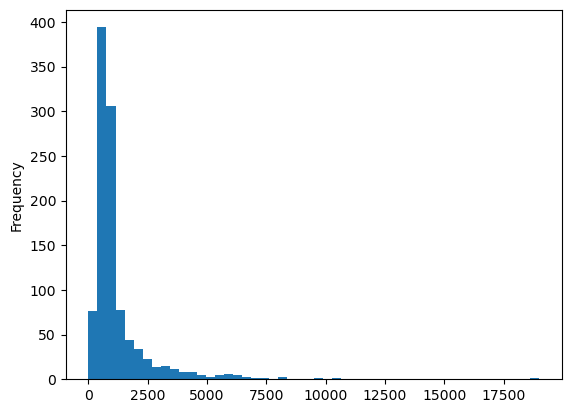

In [93]:
customer_df['GrandTotal'].plot(kind='hist', bins=50)

<Axes: ylabel='Density'>

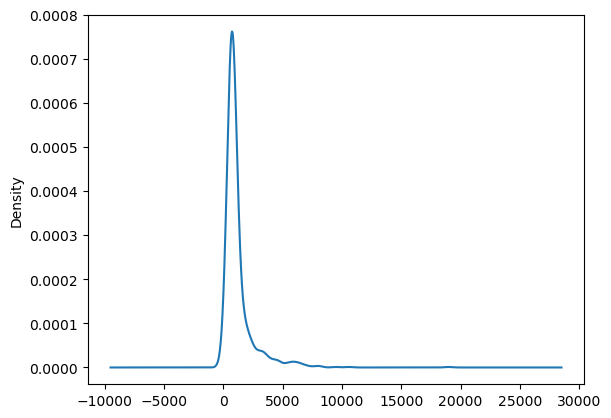

In [94]:
customer_df['GrandTotal'].plot(kind='kde')

In [95]:
# Univariate Labour:

In [96]:
customer_df['Labour'].describe()

count    1047.000000
mean      173.642789
std       229.737468
min         0.000000
25%         0.000000
50%       200.000000
75%       200.000000
max      1800.000000
Name: Labour, dtype: float64

In [97]:
customer_df.sort_values(by='Labour').head(432)

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
524,531,611,2023-03-03,PANKAJ,UP32MA9095,0.0,460.0,460,BIKERS CLUB,CM000547,VH000547,CC000001,PLEASURE,WM000001,Ronu,8787292129,200.0,JC000543,0
615,623,691,2023-04-02,SUMIT,UP32ML0553,0.0,580.0,580,BIKERS CLUB,CM000639,VH000639,CC000001,HERO SPL+,WM000004,PANKAJ,8400966038,200.0,JC000635,0
618,626,6930,2023-04-02,AYUSH,UP32MJ2939,0.0,1120.0,1120,BIKERS CLUB,CM000642,VH000642,CC000001,HERO SPL+,WM000001,Ronu,6394428695,150.0,JC000638,0
620,629,698,2023-04-03,SHABH CHAUDRY,UP35Z5698,0.0,600.0,600,BIKERS CLUB,CM000645,VH000645,CC000001,PLATINA,WM000004,PANKAJ,9839548564,200.0,JC000641,0
621,630,695,2023-04-03,GAURAV PATEL,UP32JY0073,0.0,550.0,550,BIKERS CLUB,CM000646,VH000646,CC000001,ACTIVA,WM000007,BABLOO,7007835935,200.0,JC000642,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,317,3980,2022-12-22,ADITYA,UP32FU4834,0.0,823.0,823,BIKERS CLUB,CM000324,VH000324,CC000001,HONDA SHINE,WM000002,Shiv Kumar,9369243657,200.0,JC000321,0
333,340,4150,2022-12-28,RE,BR01ES8401,0.0,739.0,739,BIKERS CLUB,CM000347,VH000347,CC000001,RE CLASSIC 350,WM000001,Ronu,9838974888,400.0,JC000344,0
36,38,129,2022-09-19,DEEP,UP32AK9932,0.0,550.0,550,BIKERS CLUB,CM000040,VH000040,CC000001,ACTIVA,WM000002,Shiv Kumar,8354991317,0.0,JC000038,44
29,30,121,2022-09-18,MUNNA,UP32GY7024,9.0,300.0,300,BIKERS CLUB,CM000032,VH000032,CC000001,SHINA,WM000001,Ronu,9839663267,0.0,JC000030,0


In [98]:
customer_df['Labour'].sum()

181804.0

<Axes: ylabel='Frequency'>

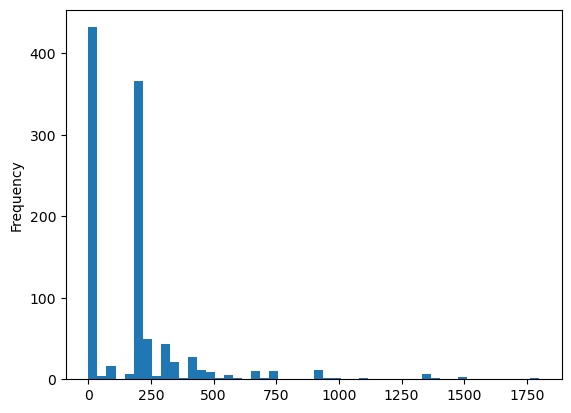

In [99]:
customer_df['Labour'].plot(kind='hist', bins=50)

<Axes: ylabel='Density'>

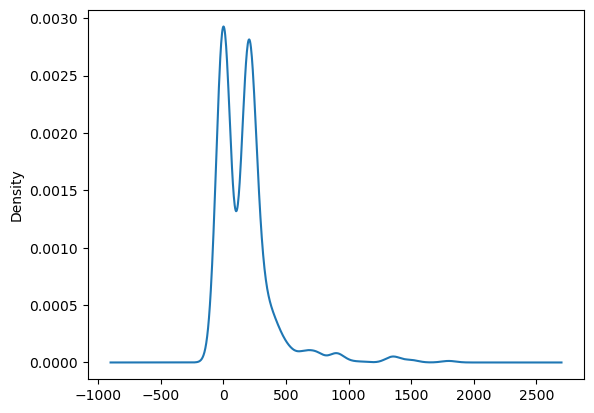

In [100]:
customer_df['Labour'].plot(kind='kde')

In [101]:
# Univariate Parts:

In [102]:
customer_df['Parts'].describe()

count     1047.000000
mean      1211.074499
std       1341.266296
min          0.000000
25%        600.000000
50%        800.000000
75%       1156.000000
max      19000.000000
Name: Parts, dtype: float64

<Axes: ylabel='Frequency'>

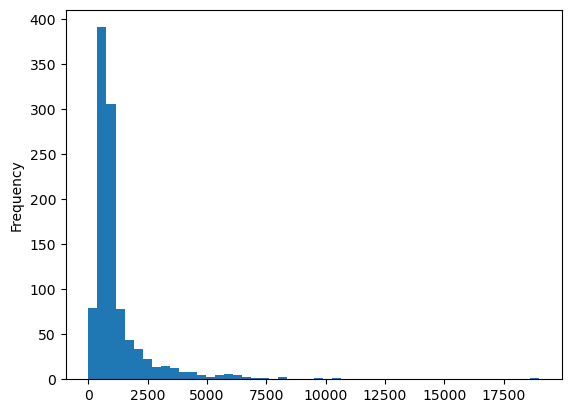

In [103]:
customer_df['Parts'].plot(kind='hist', bins=50)

<Axes: ylabel='Density'>

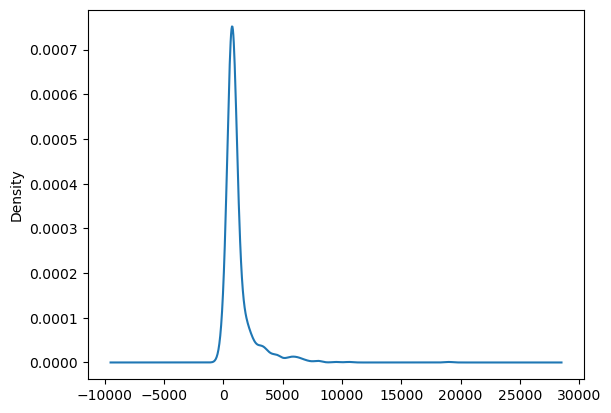

In [104]:
customer_df['Parts'].plot(kind='kde')

In [105]:
# Univariate vWorkerName:

<Axes: >

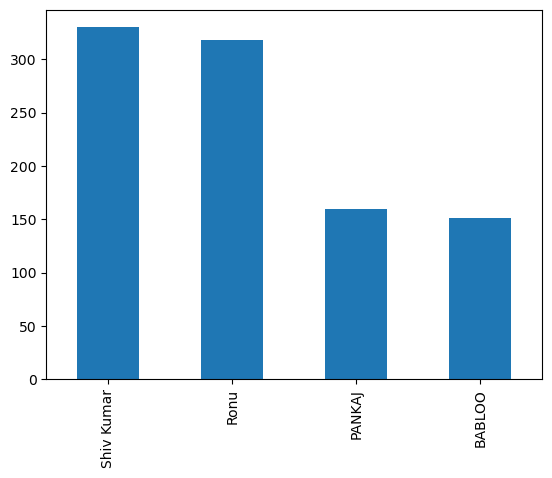

In [106]:
customer_df['vWorkerName'].value_counts()[0:4].plot(kind='bar')

In [107]:
# Univariate Model:

In [108]:
model = customer_df['Model'].value_counts().head(25)

In [109]:
model.head(25)

ACTIVA              211
HERO SPL+            96
PULSAR               50
HERO HF DELUX        46
HERO PASSION PRO     43
HONDA SHINE          43
APACHE               38
SUPER SPLENDER       36
JUPITER              30
MASTERO              29
SUPER                25
DISCOVER             22
PASS.X.PRO           20
HF DELUXE            19
TVS SPORT            19
PLEASURE             18
RE CLASSIC 350       18
GLAMOUR              17
BAJAJ AVENGER        14
PLATINA              14
YAMAHA FZ-S          13
SPL PRO              11
HERO MESTRO           8
TVS SCOOTY PEPT       7
HONDA SP 125          7
Name: Model, dtype: int64

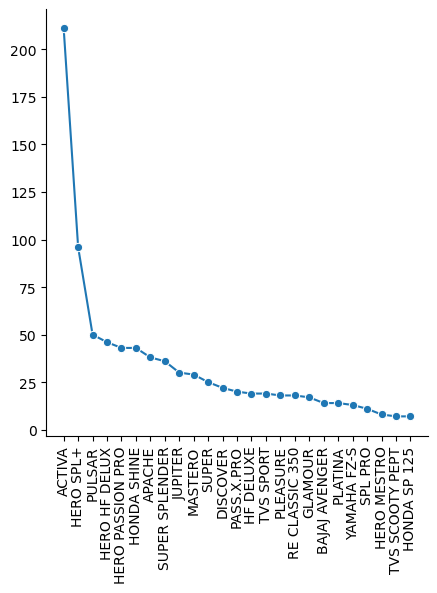

In [110]:
sns.relplot(data=model.head(25), x=model.index, y=model.values, kind='line', marker='o').set_xticklabels(rotation=90)

In [111]:
# Univariate Reg_no:

In [112]:
customer_df.value_counts('Reg_no').head(4)

Reg_no
UPX           7
UP32KF5110    6
UP31AB6634    5
UP32KX2046    5
dtype: int64

In [113]:
customer_df[customer_df['Reg_no'] == 'UPX']

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
433,440,512,2023-01-29,ROY,UPX,200.0,560.0,560,BIKERS CLUB,CM000447,VH000447,CC000001,ACTIVA,WM000004,PANKAJ,7081564882,200.0,JC000444,33
519,526,566,2023-02-28,ROY,UPX,200.0,800.0,800,BIKERS CLUB,CM000542,VH000542,CC000001,ACTIVA,WM000004,PANKAJ,7081564882,200.0,JC000538,50
799,808,875,2023-05-24,ROY,UPX,200.0,800.0,800,BIKERS CLUB,CM000832,VH000832,CC000001,ACTIVA,WM000002,Shiv Kumar,7081564882,200.0,JC000828,30
830,841,872,2023-05-31,ROY,UPX,0.0,3000.0,3000,BIKERS CLUB,CM000869,VH000869,CC000001,ACTIVA,WM000008,GROUP,7081564882,650.0,JC000865,0
831,842,889,2023-05-31,ROY,UPX,0.0,3000.0,3000,BIKERS CLUB,CM000870,VH000870,CC000001,ACTIVA,WM000007,BABLOO,7081564882,400.0,JC000866,0
894,905,970,2023-06-19,ROY,UPX,0.0,790.0,790,BIKERS CLUB,CM000933,VH000933,CC000001,ACTIVA,WM000008,GROUP,7081564882,200.0,JC000929,0
1021,1034,1105,2023-07-26,ROY,UPX,200.0,0.0,200,BIKERS CLUB,CM001062,VH001062,CC000001,ACTIVA,WM000002,Shiv Kumar,7081564882,200.0,JC001058,0


In [114]:
# dropping the repeated row
customer_df.drop(830, axis=0, inplace=True)

In [115]:
# Univariate Reg_no:

In [116]:
customer_df.groupby(['vCustomerName', 'vMobile']).count().sort_values('Reg_no', ascending=False).head(10)

,,cInvoiceCode,JobtypeNo,Jdate,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,totalLaborwithtax,JobcardNo,Discount
vCustomerName,vMobile,,,,,,,,,,,,,,,,,
ANITA,8318434232,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
KRIPARAM PANDAY,9919846852,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
SATYA PRAKASH,9936404429,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
RAMESH,6394119184,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
SHIVANKAR MISHRA,9140831987,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
ROY,7081564882,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
DEEPAK,9838181780,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
NAMO NARAYAN RAI,8853014378,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
RAKESH,8874831800,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [117]:
customer_df[customer_df['vMobile'] == '8874831800'].sum()

C:\Users\amrit\AppData\Local\Temp\ipykernel_936\3736689925.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer_df[customer_df['vMobile'] == '8874831800'].sum()


cInvoiceCode                                                      1706
JobtypeNo                                                        11938
vCustomerName                           RAKESHRAKESHRAKESHRAKESHRAKESH
Reg_no               UP32GM8026UP32HZ1747UP32HZ1747UP32HZ1747UP32HZ...
Labour                                                          1350.0
Parts                                                           5672.0
GrandTotal                                                        5672
VCompanyName         BIKERS CLUBBIKERS CLUBBIKERS CLUBBIKERS CLUBBI...
cCustomerCode                 CM000149CM000171CM000366CM000457CM000602
VehicelID                     VH000149VH000171VH000366VH000457VH000602
cCompanyCode                  CC000001CC000001CC000001CC000001CC000001
Model                HONDA DREAM YUGAPASS.X.PROPASS.X.PROHERO PASSI...
cWorkerCode                   WM000001WM000002WM000001WM000002WM000001
vWorkerName                           RonuShiv KumarRonuShiv KumarRonu
vMobil

In [118]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,VehicelID,cCompanyCode,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,VH000002,CC000001,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,VH000003,CC000001,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,VH000004,CC000001,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,VH000005,CC000001,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,VH000006,CC000001,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,VH000785,CC000001,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0
1044,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,VH000786,CC000001,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0
1045,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,VH000790,CC000001,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0
1046,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,VH000841,CC000001,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161


In [119]:
# date wise servicing

In [120]:
customer_df['year'] = customer_df['Jdate'].dt.year

In [121]:
customer_df['month'] = customer_df['Jdate'].dt.month_name()

In [122]:
customer_df['day'] = customer_df['Jdate'].dt.day_name()

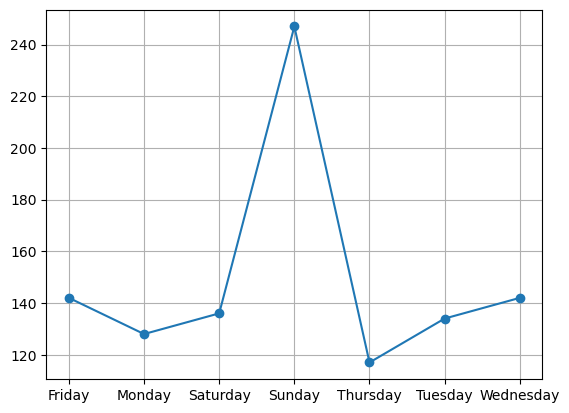

In [123]:
plt.plot(customer_df.groupby('day')['cInvoiceCode'].count(), marker='o')
plt.grid()

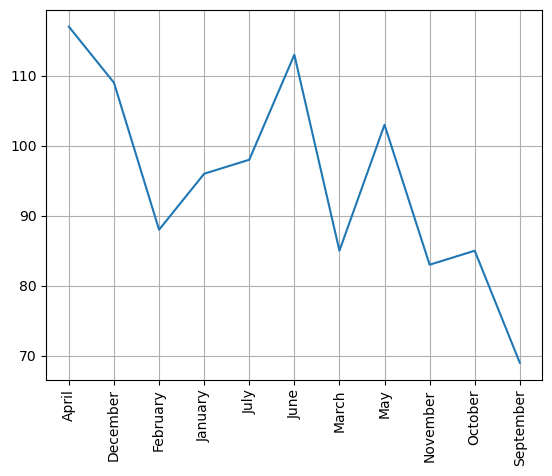

In [124]:
plt.plot(customer_df.groupby('month')['cInvoiceCode'].count())
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [125]:
# Save date ranges
datec_1 = customer_df['Jdate'].dt.day <= 15

In [126]:
datec_2 = ~datec_1

In [127]:
ac = customer_df[datec_1]

In [128]:
bc = customer_df[datec_2]

In [129]:
aac = ac.groupby(ac['Jdate'].dt.date)['cInvoiceCode'].count()

In [130]:
bbc = bc.groupby(bc['Jdate'].dt.date)['cInvoiceCode'].count()

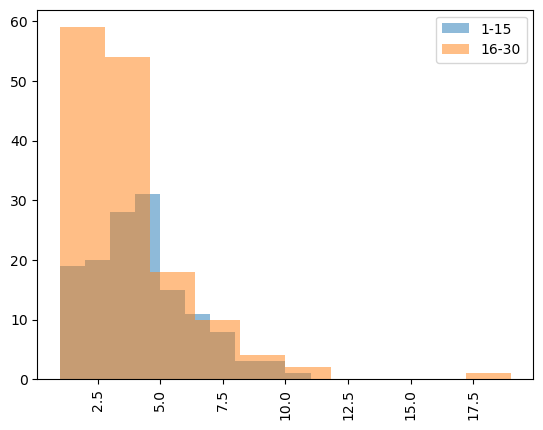

In [131]:
plt.hist(aac, label='1-15', alpha=0.5)
plt.hist(bbc, label='16-30', alpha=0.5)
plt.xticks(rotation = 90)
plt.legend()

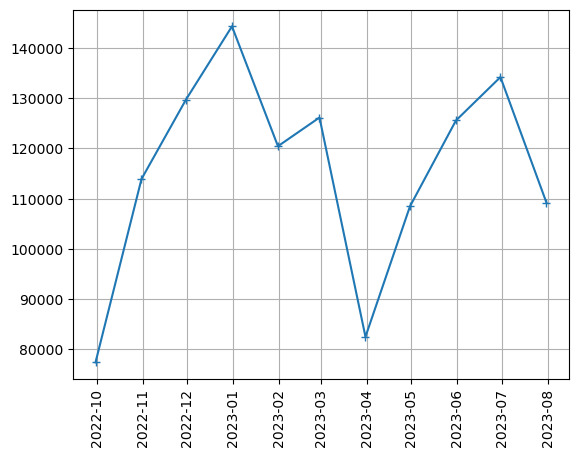

In [132]:
growth = customer_df.resample('m', on='Jdate')['GrandTotal'].sum()
plt.plot(growth, marker='+')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Items list

In [133]:
items_df.sample(5)

,JobcardNo,Jdate,Qty,PartCode1,cCompanyCode,vItemName
482,JC000265,2022-12-06,1,IM000230,CC000001,DRUM BOLT
2118,JC000899,2023-06-12,1,IM000522,CC000001,SEAT COVER
1611,JC000504,2023-02-23,1,IM000473,CC000001,WALLASER SET HERO
1167,JC000255,2022-12-03,1,IM000650,CC000001,CARBURETOR HERO MAESTRO
2112,JC000403,2023-01-15,1,IM000362,CC000001,8 NO NUT/BOLT


In [134]:
# setting date as index
items_df.set_index('Jdate', inplace=True)

In [135]:
# sorted on base of date
items_df.sort_index(inplace=True)

In [136]:
# extracting months
items_df['month'] = items_df.index.month_name()

In [137]:
items_df['day'] = items_df.index.day_name()

In [138]:
items_df.head(10)

,JobcardNo,Qty,PartCode1,cCompanyCode,vItemName,month,day
Jdate,,,,,,,
2022-09-07,JC000001,1,IM000096,CC000001,PLATE FRICTION BAJAJ (PULSAR UG4),September,Wednesday
2022-09-07,JC000001,1,IM000041,CC000001,INDICATOR (PLATINA WHITE),September,Wednesday
2022-09-07,JC000001,1,IM000051,CC000001,BRAKE SHOE (PULSAR),September,Wednesday
2022-09-07,JC000001,1,IM000112,CC000001,AIR FILTER MINDA (PULSAR UG4),September,Wednesday
2022-09-07,JC000001,1,IM000214,CC000001,CASTROL POWER 1 CRUSE 20W-50,September,Wednesday
2022-09-07,JC000001,1,IM000101,CC000001,PLATE CLUTCH PRESSURE BAJAJ (PULSAR 150),September,Wednesday
2022-09-07,JC000001,1,IM000095,CC000001,CENTRE CLUTCH BAJAJ (PULSAR 150),September,Wednesday
2022-09-08,JC000002,1,IM000053,CC000001,BRAKE SHOE (JUPITER/WEGO),September,Thursday
2022-09-08,JC000002,1,IM000221,CC000001,CASTROL ACTIVE HONDA 10W30,September,Thursday


In [139]:
item_dt = items_df.groupby('Jdate').sum()

C:\Users\amrit\AppData\Local\Temp\ipykernel_936\2361390973.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  item_dt = items_df.groupby('Jdate').sum()


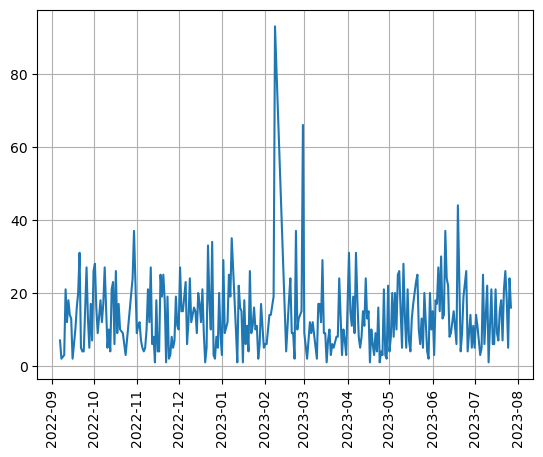

In [140]:
# item consumption by time
plt.plot(item_dt.index, item_dt.values)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [141]:
# item consumption by month
item_dt = items_df.groupby('month').sum()

C:\Users\amrit\AppData\Local\Temp\ipykernel_936\3648910900.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  item_dt = items_df.groupby('month').sum()


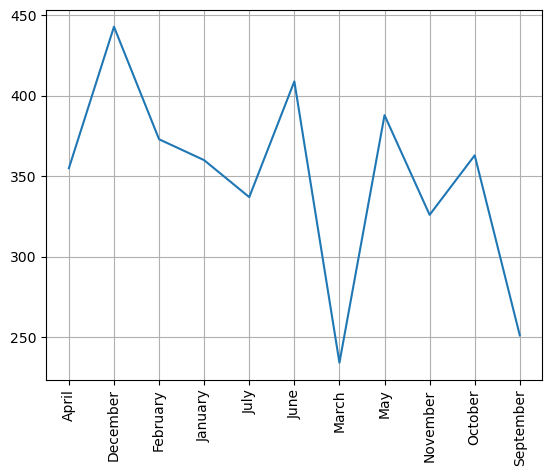

In [142]:
plt.plot(item_dt.index, item_dt.values)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [143]:
# item consumption by day
item_dt = items_df.groupby('day').sum()

C:\Users\amrit\AppData\Local\Temp\ipykernel_936\973203298.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  item_dt = items_df.groupby('day').sum()


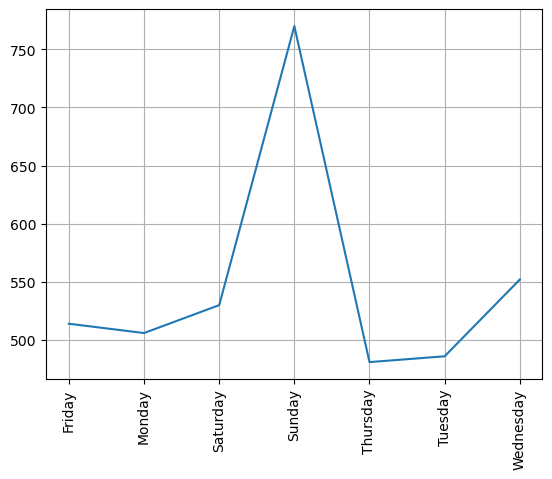

In [144]:
plt.plot(item_dt.index, item_dt.values)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [145]:
# item consumption by start / end

In [146]:
items_df['vItemName'].value_counts()

CASTROL ACTIVE 4T 20W40 0.9L    239
CASTROL ACTIVE HONDA 10W30      116
CASTROL ACTIV 4T 20W40           98
DRUM BOLT                        73
CASTROL ACTIVE SCOOTER           73
                               ... 
HAND GRIP (SONAL)                 1
HEAD PACKING                      1
CARBURETOR BAJAJ AVENGER          1
INDICATOR AVENGER 150             1
CLUTCH ASSY PULSAR 220            1
Name: vItemName, Length: 668, dtype: int64

In [147]:
items_df

,JobcardNo,Qty,PartCode1,cCompanyCode,vItemName,month,day
Jdate,,,,,,,
2022-09-07,JC000001,1,IM000096,CC000001,PLATE FRICTION BAJAJ (PULSAR UG4),September,Wednesday
2022-09-07,JC000001,1,IM000041,CC000001,INDICATOR (PLATINA WHITE),September,Wednesday
2022-09-07,JC000001,1,IM000051,CC000001,BRAKE SHOE (PULSAR),September,Wednesday
2022-09-07,JC000001,1,IM000112,CC000001,AIR FILTER MINDA (PULSAR UG4),September,Wednesday
2022-09-07,JC000001,1,IM000214,CC000001,CASTROL POWER 1 CRUSE 20W-50,September,Wednesday
...,...,...,...,...,...,...,...
2023-07-27,JC001064,1,IM000597,CC000001,TIMING CHAIN ADJUSTER,July,Thursday
2023-07-27,JC001064,1,IM000845,CC000001,TIMING CHAIN,July,Thursday
2023-07-27,JC001064,1,IM000292,CC000001,WALL/WALL SEAL KIT,July,Thursday


In [148]:
# assigning year
items_df['year'] = items_df.index.year

In [149]:
items_df

,JobcardNo,Qty,PartCode1,cCompanyCode,vItemName,month,day,year
Jdate,,,,,,,,
2022-09-07,JC000001,1,IM000096,CC000001,PLATE FRICTION BAJAJ (PULSAR UG4),September,Wednesday,2022
2022-09-07,JC000001,1,IM000041,CC000001,INDICATOR (PLATINA WHITE),September,Wednesday,2022
2022-09-07,JC000001,1,IM000051,CC000001,BRAKE SHOE (PULSAR),September,Wednesday,2022
2022-09-07,JC000001,1,IM000112,CC000001,AIR FILTER MINDA (PULSAR UG4),September,Wednesday,2022
2022-09-07,JC000001,1,IM000214,CC000001,CASTROL POWER 1 CRUSE 20W-50,September,Wednesday,2022
...,...,...,...,...,...,...,...,...
2023-07-27,JC001064,1,IM000597,CC000001,TIMING CHAIN ADJUSTER,July,Thursday,2023
2023-07-27,JC001064,1,IM000845,CC000001,TIMING CHAIN,July,Thursday,2023
2023-07-27,JC001064,1,IM000292,CC000001,WALL/WALL SEAL KIT,July,Thursday,2023


In [150]:
# Save date ranges
date_1 = items_df.index.day <= 15

In [151]:
date_2 = ~date_1

In [152]:
a = items_df[date_1]

In [153]:
b = items_df[date_2]

In [154]:
aa = a.groupby(a.index.date)['Qty'].sum()

In [155]:
bb = b.groupby(b.index.date)['Qty'].sum()

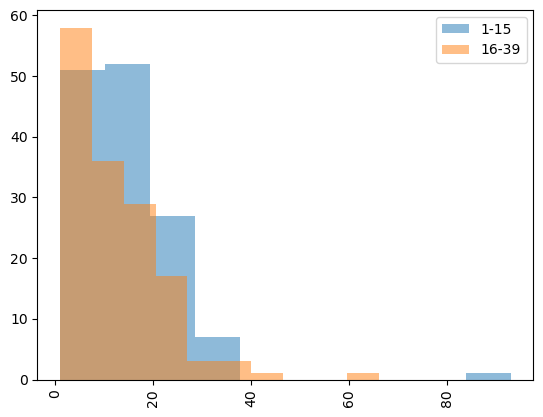

In [156]:
plt.hist(aa, label='1-15', alpha=0.5)
plt.hist(bb, label='16-39', alpha=0.5)
plt.xticks(rotation = 90)
plt.legend()

In [157]:
# Engine oil consumption per month

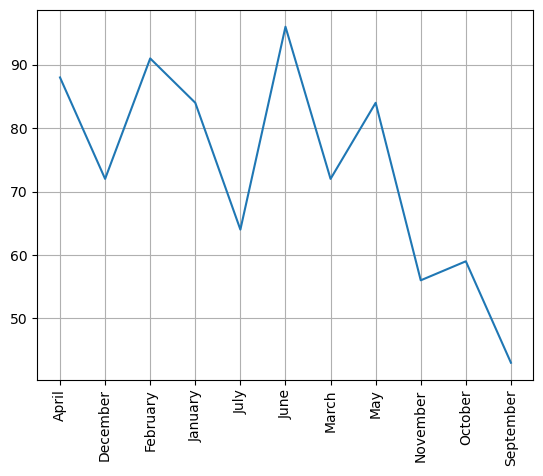

In [158]:
engine_oil = items_df[items_df['vItemName'].str.contains('CASTROL')].groupby('month')['Qty'].sum()
plt.plot(engine_oil)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [159]:
# Engine work month wise

In [160]:
engine = items_df[items_df['vItemName'] == 'WALL/WALL SEAL KIT']

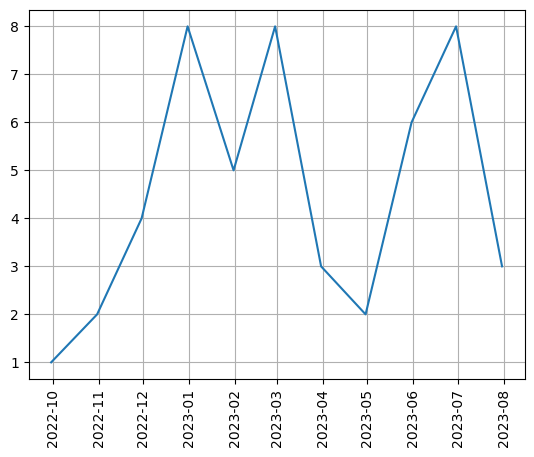

In [161]:
plt.plot(engine.resample('m')['Qty'].sum())
plt.xticks(rotation=90)
plt.grid()

In [162]:
# Sales of good

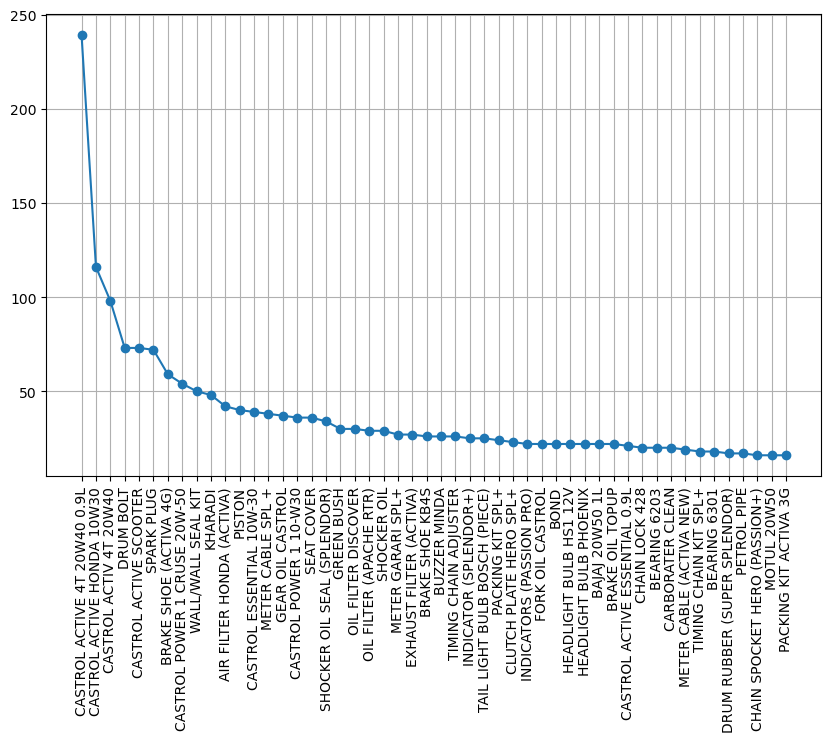

In [163]:
items_df['vItemName'].value_counts().head(50)
plt.figure(figsize=(10,6))
plt.plot(items_df['vItemName'].value_counts().head(50), marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Bi

In [164]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,year,month,day
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266,2022,September,Wednesday
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46,2022,September,Thursday
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70,2022,September,Saturday
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28,2022,September,Saturday
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60,2022,September,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0,2023,May,Thursday
1044,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0,2023,May,Thursday
1045,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0,2023,May,Friday
1046,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161,2023,May,Monday


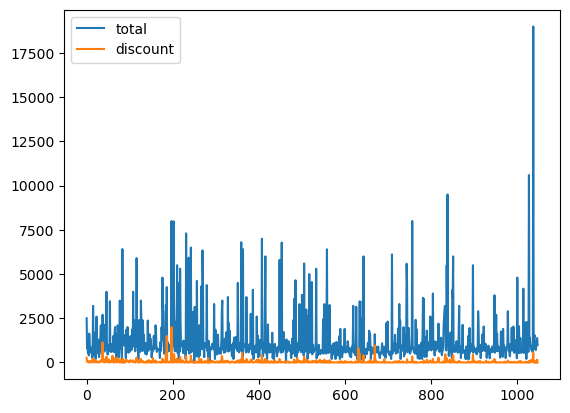

In [165]:
 # labour vs parts vs total vs discount
plt.plot(customer_df['GrandTotal'], label='total')
plt.plot(customer_df['Discount'], label='discount')
plt.legend()

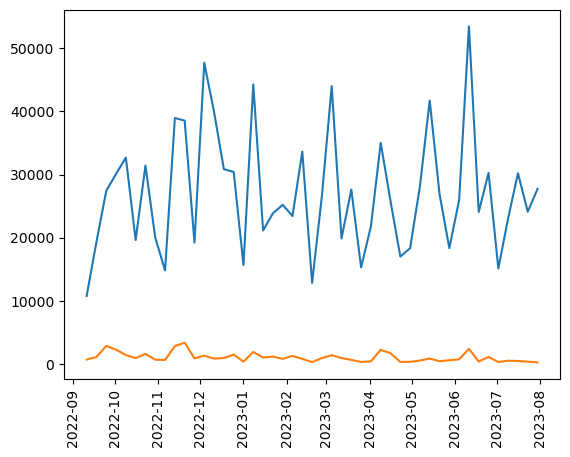

In [166]:
plt.plot(customer_df.resample('W', on='Jdate')['GrandTotal'].sum())
plt.xticks(rotation=90)
plt.plot(customer_df.resample('W', on='Jdate')['Discount'].sum())
plt.xticks(rotation=90)
plt.show()

In [167]:
# comparing performance of the mechanics

<Axes: xlabel='vWorkerName'>

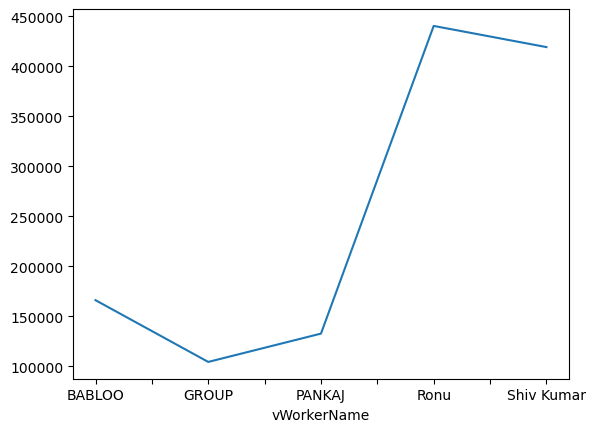

In [168]:
customer_df.groupby('vWorkerName')['GrandTotal'].sum()[[1, 2, 4, 5, 7]].plot()

In [169]:
repeat = customer_df.groupby(['vWorkerName', 'vCustomerName']).count().sort_values(by='cInvoiceCode', ascending=False)['cInvoiceCode'].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


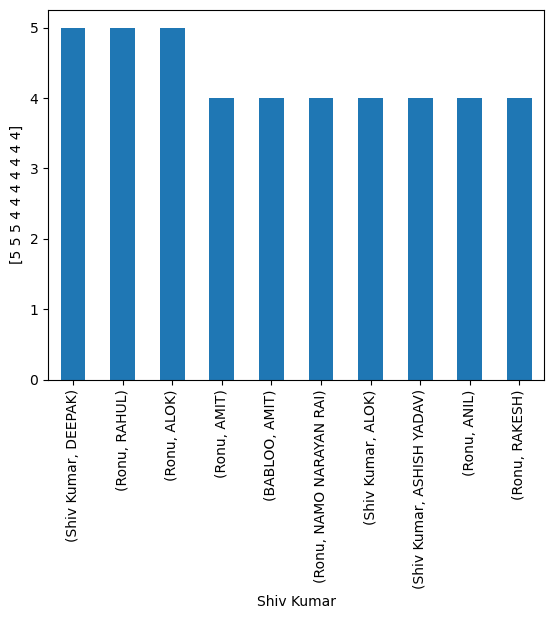

In [170]:
repeat.plot(kind='bar', legend=False)
plt.xlabel(repeat.index.get_level_values(0).unique()[0])
plt.ylabel(repeat.values)
plt.show()

In [171]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,year,month,day
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266,2022,September,Wednesday
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46,2022,September,Thursday
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70,2022,September,Saturday
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28,2022,September,Saturday
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60,2022,September,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0,2023,May,Thursday
1044,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0,2023,May,Thursday
1045,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0,2023,May,Friday
1046,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161,2023,May,Monday


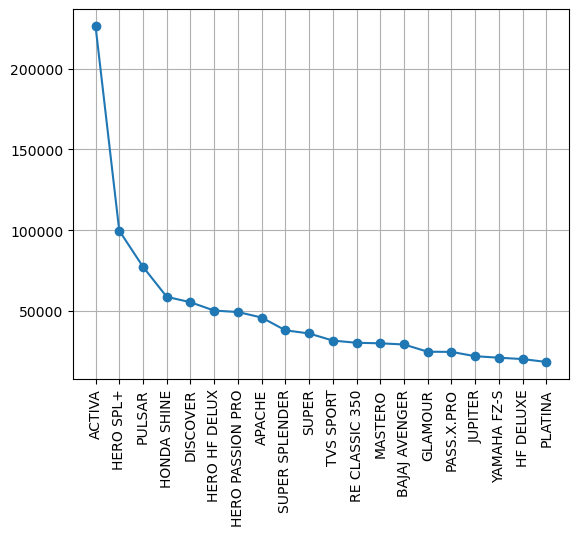

In [172]:
# bikes with date
bikes = customer_df.groupby('Model')['GrandTotal'].sum().sort_values(ascending=False).head(20)
plt.plot(bikes, marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [173]:
# top 5 bikes with time
top_5_bikes = ['ACTIVA', 'HERO SPL+', 'PULSAR', 'HONDA SHINE', 'RE CLASSIC 350']
activa = customer_df[customer_df['Model'] == 'ACTIVA']

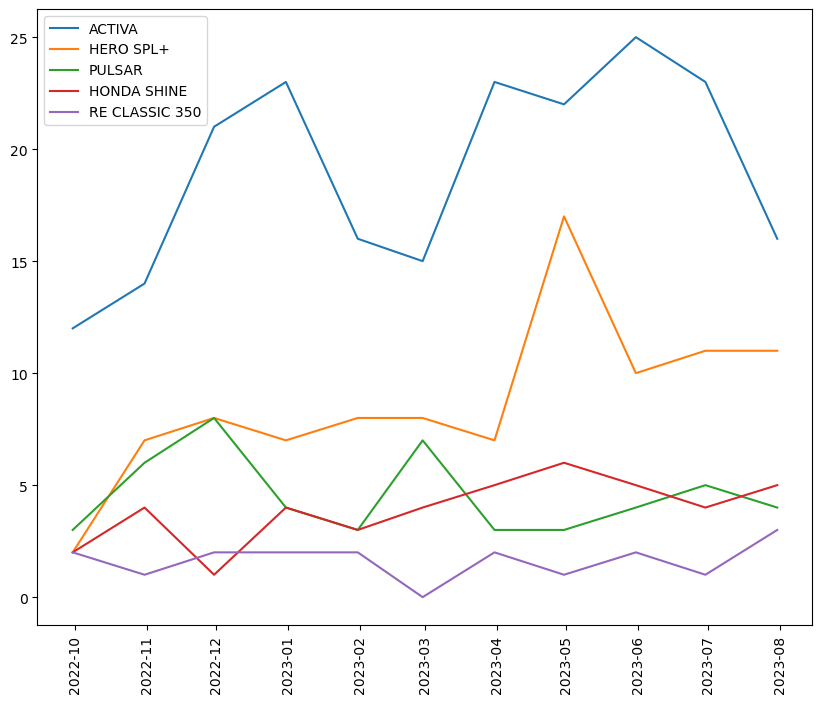

In [174]:
plt.figure(figsize=(10,8))
for i in top_5_bikes:
    a = customer_df[customer_df['Model'] == i]
    plt.plot(a.resample('m', on='Jdate').count()['cInvoiceCode'], label=i)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [175]:
# top 5 items other than engine oil

In [176]:
item_list = items_df[~items_df['vItemName'].str.contains('CASTROL')].groupby('vItemName')['Qty'].sum().sort_values(ascending=False).head(30)

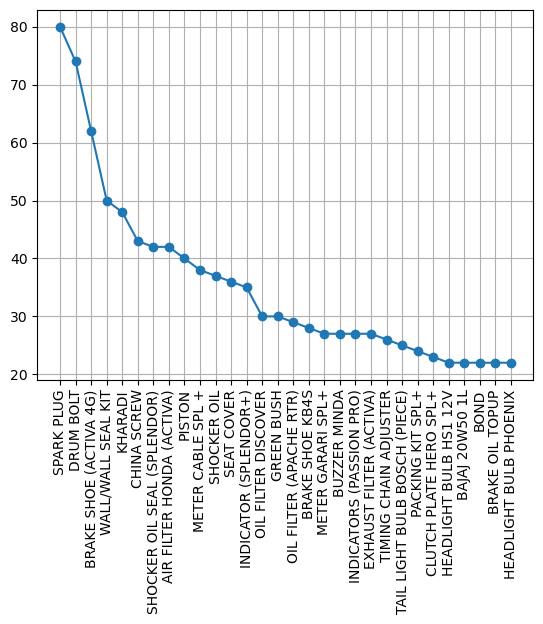

In [177]:
plt.plot(item_list, marker='o')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [178]:
top_12_items = list(item_list.index)[0:5]

C:\Users\amrit\AppData\Local\Temp\ipykernel_936\2344744608.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(a.resample('m').sum()['Qty'], label=i)
C:\Users\amrit\AppData\Local\Temp\ipykernel_936\2344744608.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(a.resample('m').sum()['Qty'], label=i)
C:\Users\amrit\AppData\Local\Temp\ipykernel_936\2344744608.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the functio

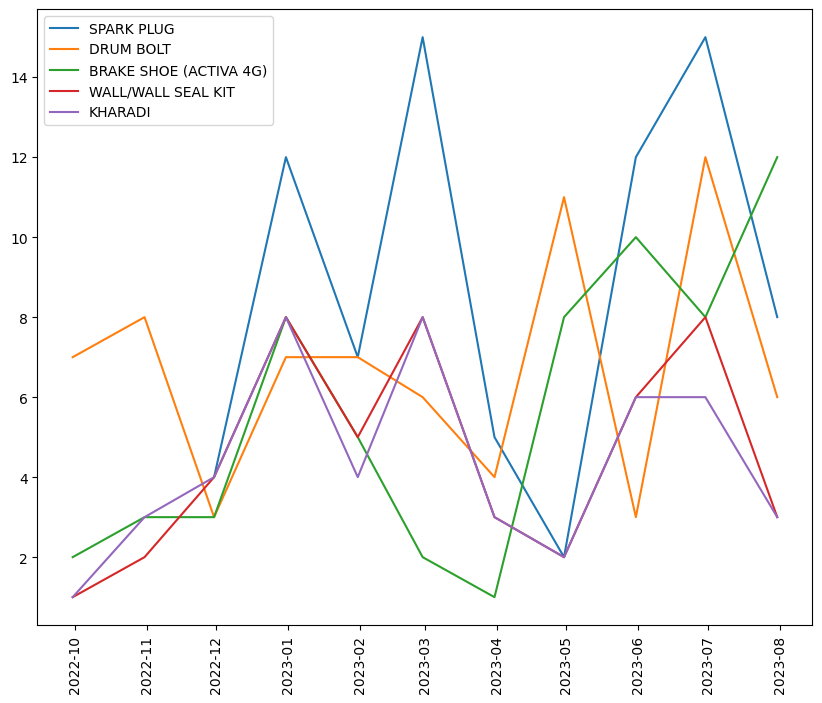

In [179]:
plt.figure(figsize=(10,8))
for i in top_12_items:
    a = items_df[items_df['vItemName'] == i]
    plt.plot(a.resample('m').sum()['Qty'], label=i)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [180]:
items_df

,JobcardNo,Qty,PartCode1,cCompanyCode,vItemName,month,day,year
Jdate,,,,,,,,
2022-09-07,JC000001,1,IM000096,CC000001,PLATE FRICTION BAJAJ (PULSAR UG4),September,Wednesday,2022
2022-09-07,JC000001,1,IM000041,CC000001,INDICATOR (PLATINA WHITE),September,Wednesday,2022
2022-09-07,JC000001,1,IM000051,CC000001,BRAKE SHOE (PULSAR),September,Wednesday,2022
2022-09-07,JC000001,1,IM000112,CC000001,AIR FILTER MINDA (PULSAR UG4),September,Wednesday,2022
2022-09-07,JC000001,1,IM000214,CC000001,CASTROL POWER 1 CRUSE 20W-50,September,Wednesday,2022
...,...,...,...,...,...,...,...,...
2023-07-27,JC001064,1,IM000597,CC000001,TIMING CHAIN ADJUSTER,July,Thursday,2023
2023-07-27,JC001064,1,IM000845,CC000001,TIMING CHAIN,July,Thursday,2023
2023-07-27,JC001064,1,IM000292,CC000001,WALL/WALL SEAL KIT,July,Thursday,2023


In [181]:
customer_df

,cInvoiceCode,JobtypeNo,Jdate,vCustomerName,Reg_no,Labour,Parts,GrandTotal,VCompanyName,cCustomerCode,...,Model,cWorkerCode,vWorkerName,vMobile,totalLaborwithtax,JobcardNo,Discount,year,month,day
0,1,1,2022-09-07,BHOLA YADAV,AP31BT5944,450.0,2500.0,2500,BIKERS CLUB,CM000002,...,PULSAR,WM000001,Ronu,7719771481,450.0,JC000001,266,2022,September,Wednesday
1,2,1,2022-09-08,DEEPAK TRIPATHI,UP32GV9086,200.0,800.0,800,BIKERS CLUB,CM000003,...,TVS JUPITER,WM000002,Shiv Kumar,9369555234,200.0,JC000002,46,2022,September,Thursday
2,3,85,2022-09-10,AGLESH YADAV,UP32JZ6843,400.0,1200.0,1200,BIKERS CLUB,CM000004,...,YAMAHA R15 V3,WM000002,Shiv Kumar,8299766335,400.0,JC000003,70,2022,September,Saturday
3,4,86,2022-09-10,AMIT,UP32UK5628,200.0,550.0,550,BIKERS CLUB,CM000005,...,JUPITER,WM000002,Shiv Kumar,9839723385,200.0,JC000004,28,2022,September,Saturday
4,5,88,2022-09-11,ASUTOSH,BR2C1340,200.0,1200.0,1200,BIKERS CLUB,CM000006,...,HERO HONDA SPL,WM000001,Ronu,8090060663,200.0,JC000005,60,2022,September,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,18,827,2023-05-11,BRIJKISHORE,UP32KY6419,0.0,700.0,700,BIKERS CLUB,CM000785,...,HERO YUGA,WM000004,PANKAJ,9118174911,200.0,JC000781,0,2023,May,Thursday
1044,19,829,2023-05-11,NITISH SINGH,UP32JF3140,0.0,950.0,950,BIKERS CLUB,CM000786,...,ACTIVA,WM000002,Shiv Kumar,9532722634,300.0,JC000782,0,2023,May,Thursday
1045,20,832,2023-05-12,GAURI,UP32LF3449,0.0,1100.0,1100,BIKERS CLUB,CM000790,...,ACTIVA,WM000002,Shiv Kumar,6386879411,236.0,JC000786,0,2023,May,Friday
1046,21,891,2023-05-29,ANITA,UP32KF5110,510.0,1380.0,1380,BIKERS CLUB,CM000841,...,PLEASURE,WM000008,GROUP,8318434232,601.8,JC000837,161,2023,May,Monday


<Axes: xlabel='GrandTotal', ylabel='Discount'>

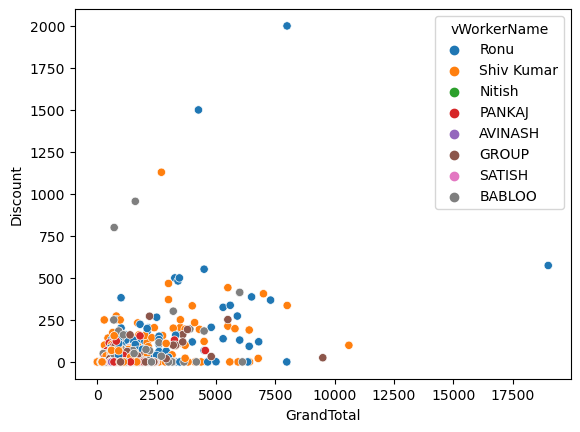

In [182]:
# plt.scatter(customer_df['GrandTotal'], customer_df['Discount'], hue='vWorkerName')
sns.scatterplot(customer_df, x='GrandTotal', y='Discount', hue='vWorkerName')